# Comparando classificadores de redução de dimensionalidade

## Bibliotecas

In [79]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Dataset

In [2]:
from sklearn.datasets import fetch_lfw_people

In [3]:
faces = fetch_lfw_people(min_faces_per_person=60, data_home="~/data/")

In [4]:
X = faces.data
y = faces.target

print('Formato das imagens das faces: ', faces.images.shape)
print('Formato de X (caracteristicas): ', X.shape)
print('Formato de y (rotulos): ', y.shape)
print('Nomes do rótulos: ', faces.target_names)

Formato das imagens das faces:  (1348, 62, 47)
Formato de X (caracteristicas):  (1348, 2914)
Formato de y (rotulos):  (1348,)
Nomes do rótulos:  ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


### Balanceando os dados

In [113]:
(unique, counts) = np.unique(y, return_counts=True)
frequency = np.asarray((unique, counts)).T
frequency

array([[  0,  77],
       [  1, 236],
       [  2, 121],
       [  3, 530],
       [  4, 109],
       [  5,  71],
       [  6,  60],
       [  7, 144]])

In [81]:
df_faces = pd.DataFrame(X)
df_faces['y'] = y
df_faces

,0,1,2,3,4,5,6,7,8,9,...,2905,2906,2907,2908,2909,2910,2911,2912,2913,y
0,138.000000,135.666672,127.666664,120.666664,117.000000,119.666664,126.000000,133.333328,138.000000,143.666672,...,24.666666,4.666667,2.666667,1.333333,0.333333,1.333333,1.666667,1.666667,0.333333,1
1,71.333336,56.000000,67.666664,91.333336,91.666664,72.333336,101.666664,124.666664,124.333336,127.666664,...,248.333328,252.666672,253.333328,253.000000,253.666672,251.666672,247.666672,243.000000,238.333328,3
2,84.333336,97.333336,72.333336,56.666668,95.333336,118.333336,123.666664,128.666672,130.333328,134.666672,...,91.000000,106.666664,116.000000,123.000000,118.333336,102.000000,114.000000,194.333328,241.000000,3
3,68.333336,81.666664,121.666664,135.000000,138.666672,141.333328,142.000000,148.333328,159.666672,171.000000,...,104.000000,165.000000,224.000000,232.333328,228.666672,230.000000,229.333328,224.333328,206.666672,3
4,56.666668,55.333332,47.333332,47.000000,50.000000,44.666668,44.666668,52.000000,62.333332,55.000000,...,39.666668,37.333332,34.333332,34.000000,34.333332,34.333332,34.666668,35.666668,34.000000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343,44.333332,46.000000,45.333332,58.000000,80.333336,112.333336,146.666672,168.000000,175.000000,178.666672,...,94.666664,89.666664,91.666664,94.000000,90.333336,86.333336,87.000000,94.333336,116.333336,5
1344,86.333336,83.333336,76.333336,74.333336,87.666664,114.000000,144.666672,167.333328,180.333328,183.666672,...,50.666668,46.333332,42.333332,40.666668,41.333332,43.666668,48.000000,49.000000,40.666668,5
1345,29.333334,29.000000,29.333334,48.666668,90.666664,96.000000,85.000000,78.666664,123.000000,156.333328,...,134.000000,132.666672,134.333328,141.000000,147.666672,145.000000,145.000000,147.000000,141.666672,7
1346,49.333332,55.666668,76.666664,89.666664,76.666664,75.333336,98.666664,118.333336,111.000000,82.000000,...,169.000000,170.666672,174.000000,184.333328,202.000000,200.666672,186.333328,176.333328,161.000000,3


In [122]:
class_0 = df_faces[df_faces['y']==0]
class_1 = df_faces[df_faces['y']==1]
class_2 = df_faces[df_faces['y']==2]
class_3 = df_faces[df_faces['y']==3]
class_4 = df_faces[df_faces['y']==4]
class_5 = df_faces[df_faces['y']==5]
class_6 = df_faces[df_faces['y']==6]
class_7 = df_faces[df_faces['y']==7]

In [121]:
class_0_under = class_0.sample(frequency[6][1])
class_1_under = class_1.sample(frequency[6][1])
class_2_under = class_2.sample(frequency[6][1])
class_3_under = class_3.sample(frequency[6][1])
class_4_under = class_4.sample(frequency[6][1])
class_5_under = class_5.sample(frequency[6][1])
class_7_under = class_7.sample(frequency[6][1])

In [124]:
df_faces_under = pd.concat([
    class_6, 
    class_0_under, 
    class_1_under, 
    class_2_under,
    class_3_under,
    class_4_under,
    class_5_under,
    class_7_under], axis=0)
df_faces_under

,0,1,2,3,4,5,6,7,8,9,...,2905,2906,2907,2908,2909,2910,2911,2912,2913,y
6,43.666668,68.666664,87.666664,95.000000,97.000000,100.666664,101.333336,100.333336,102.000000,102.000000,...,208.333328,242.666672,244.666672,241.333328,182.333328,143.666672,142.000000,142.666672,141.333328,6
66,60.000000,59.000000,57.000000,55.000000,59.333332,66.000000,68.333336,74.000000,83.000000,89.666664,...,90.000000,92.666664,95.000000,98.000000,102.333336,107.333336,115.333336,125.333336,138.666672,6
80,35.333332,33.000000,38.666668,54.000000,74.666664,93.666664,102.666664,112.333336,116.333336,119.000000,...,228.666672,242.333328,242.000000,243.333328,245.333328,245.333328,244.666672,242.000000,241.000000,6
81,68.000000,71.000000,57.333332,36.333332,47.666668,63.666668,83.666664,105.000000,122.333336,130.000000,...,178.333328,174.333328,157.000000,136.666672,135.666672,145.333328,109.666664,103.000000,146.666672,6
93,26.000000,30.333334,49.666668,46.333332,52.000000,71.333336,93.666664,109.666664,127.333336,137.333328,...,88.333336,98.333336,112.666664,123.000000,156.666672,82.333336,33.333332,42.333332,41.333332,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,111.000000,100.000000,99.000000,114.666664,119.333336,127.666664,138.333328,157.666672,173.000000,176.333328,...,162.333328,165.666672,168.666672,166.333328,160.666672,159.000000,156.666672,153.666672,147.333328,7
1089,87.000000,91.666664,89.000000,82.000000,83.666664,102.000000,125.333336,135.333328,138.333328,140.333328,...,25.666666,21.000000,26.666666,30.333334,31.000000,33.666668,37.666668,38.666668,39.000000,7
687,45.666668,49.000000,58.666668,79.333336,100.333336,120.666664,133.000000,145.333328,155.333328,161.333328,...,154.666672,169.000000,167.000000,162.666672,149.000000,109.000000,146.333328,217.000000,192.333328,7
329,77.666664,77.333336,73.666664,74.666664,98.333336,128.333328,154.000000,165.333328,173.333328,191.000000,...,109.333336,114.000000,113.000000,112.333336,112.666664,106.333336,70.666664,23.333334,12.000000,7


In [129]:
X = df_faces_under.iloc[:,:-1]
y = df_faces_under.iloc[:,-1]

### Visualizando algumas imagens

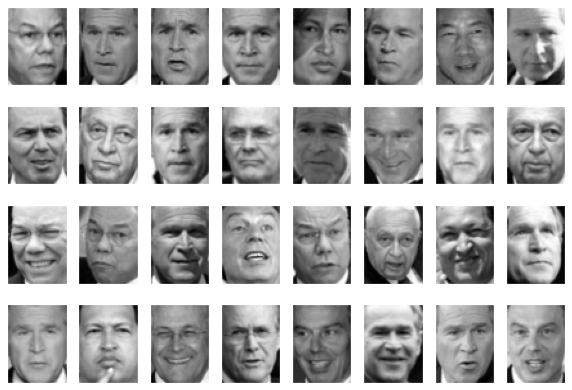

In [5]:
fig, ax = plt.subplots(4, 8, figsize=(10,7), subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='gray')

## Isomap

In [6]:
from sklearn.manifold import Isomap

### Implementando o modelo

* 3D

In [166]:
### Passo 1 - configurar a funcao Isomap. 
embed3 = Isomap(
    metric='euclidean',
    n_neighbors=40, # numero de vizinhos
    n_components=3 # numero de dimensoes
)

### Passo 2 - Ajusta os dados e os transforma de um espaco de 64 para 3 dimensoes
X_trans3 = embed3.fit_transform(X, y)
    
### Passo 3 - imprime o formato dos dados
print('O novo formato de  X: ',X_trans3.shape)

O novo formato de  X:  (480, 3)


#### Substituindo os nomes nos rótulos

In [163]:
replacements = {}
for i in np.unique(y):
    replacements[i] = faces.target_names[i]

In [164]:
y_replace = replacements.get
# [y_replace(n, n) for n in y]

### Visualizando os resultados

In [167]:
import plotly.express as px

# Cria uma plotagem 3D
fig = px.scatter_3d(None, 
                    x=X_trans3[:,0], y=X_trans3[:,1], z=X_trans3[:,2],
                    # color=y.astype(str),
                    color=[y_replace(n, n) for n in y],
                    height=900, width=900
                   )

# Ajusta o design da plotagem
fig.update_layout(#title_text="Plot 3D ",
                  showlegend=True,
                  legend=dict(orientation="h", yanchor="top", y=0, xanchor="center", x=0.5),
                  scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                        center=dict(x=0, y=0, z=-0.2),
                                        eye=dict(x=-1.5, y=1.5, z=0.5)),
                                        margin=dict(l=0, r=0, b=0, t=0),
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         ),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                          ),
                               zaxis=dict(backgroundcolor='lightgrey',
                                          color='black', 
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         )))

# ajusta o tamanho dos marcadores
fig.update_traces(marker=dict(size=4))

fig.show()

In [11]:
from matplotlib import offsetbox

def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

* 2D

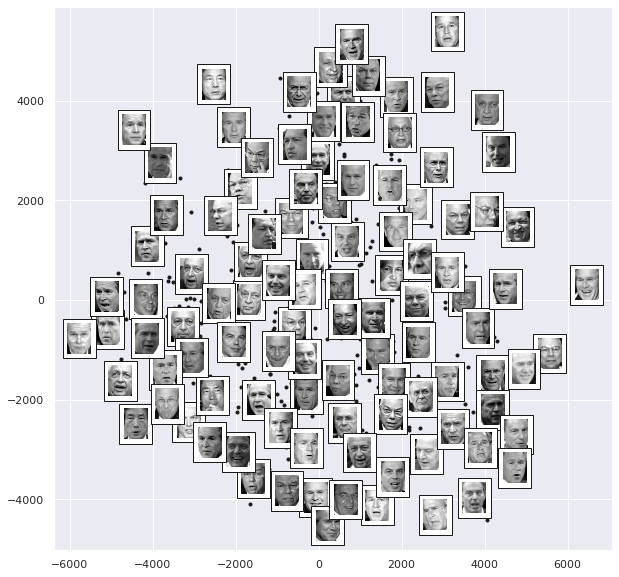

In [170]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(X,
                model=Isomap(n_components=2),
                images=faces.images[:, ::2, ::2])

## KFDA

In [13]:
from kfda import Kfda

### Particionando os dados

In [14]:
from sklearn.model_selection import train_test_split

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.60, random_state=42, stratify=y)

### Implementando o modelo

In [134]:
X_train.shape, y_train.shape

((288, 2914), (288,))

In [135]:
kfda_model = Kfda(kernel='rbf', n_components=7)
kfda_model.fit(X_train, y_train)

/home/luis/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



Kfda(kernel='rbf', n_components=7)

### Avaliando o modelo

In [136]:
print('Resultados:')
test_score = kfda_model.score(X_test, y_test)
print(f'Sobre o conjunto de testes: {test_score}')
train_score = kfda_model.score(X_train, y_train)
print(f'Sobre o conjunto de treinamento: {train_score}')

Resultados:
Sobre o conjunto de testes: 0.125
Sobre o conjunto de treinamento: 1.0


In [137]:
import itertools

In [138]:
kfda_model.predict(X_test)

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

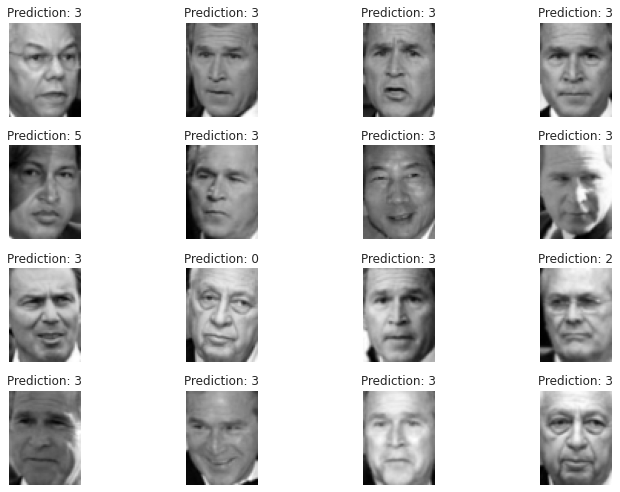

In [29]:
y_pred = kfda_model.predict(X)

f, axs = plt.subplots(4, 4, figsize=(11,7))

flattened_axs = itertools.chain(*axs)

for ax, img, pred in zip(flattened_axs, X, y_pred):
    (ax.axis('off'))
    ax.imshow(img.reshape(faces.images.shape[1], faces.images.shape[2]), cmap='gray')
    ax.set_title(f'Prediction: {pred}')
plt.tight_layout()